<a href="https://colab.research.google.com/github/EugeneStrakhov86/data-science/blob/master/ML_models_to_predict_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# 1. Завантаження даних

In [ ]:
path = "/content/drive/MyDrive/Data Science/Math/2022_dec_raw.csv"
dou = pd.read_csv(path, sep=';', decimal=',')
dou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Timestamp                                                                   13315 non-null  object 
 1   Ви працюєте зараз в ІТ?                                                     13315 non-null  object 
 2   Де ви зараз живете?                                                         13315 non-null  object 
 3   В якій області ви зараз живете?                                             11538 non-null  object 
 4   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  float64
 5   Ваша стать                                                                  13315 non-null  object 
 6   Ваш вік                                       

# 2. Попередня обробка

In [ ]:
dou.columns

Index(['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ',
       'В якій області ви зараз живете?',
       'Зарплата у $$$ за місяць, лише ставка після сплати податків',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь? ', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваша спеціалізація',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу спеціалізацію',
       'Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Вкажіть вашу основну спеціалізацію',
       'В якій сфері працюєте?', 'Тип компанії',
       'Загальний стаж роботи за спеціальністю'],
      dtype='object')

In [ ]:
dou.columns = dou.columns.str.strip()

In [ ]:
dou_useful = dou[['Де ви зараз живете?', 'Зарплата у $$$ за місяць, лише ставка після сплати податків',
                  'Ваш вік', 'Знання англійської мови', 'Яка у вас освіта?', 'Ваш тайтл', 'Тип компанії',
                  'Загальний стаж роботи за спеціальністю']]

In [ ]:
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Де ви зараз живете?                                          13315 non-null  object 
 1   Зарплата у $$$ за місяць, лише ставка після сплати податків  13288 non-null  float64
 2   Ваш вік                                                      13315 non-null  float64
 3   Знання англійської мови                                      13315 non-null  object 
 4   Яка у вас освіта?                                            13315 non-null  object 
 5   Ваш тайтл                                                    13315 non-null  object 
 6   Тип компанії                                                 13315 non-null  object 
 7   Загальний стаж роботи за спеціальністю                       13315 non-null  

In [ ]:
mapper = {'Де ви зараз живете?': 'in_ukraine',
          'Зарплата у $$$ за місяць, лише ставка після сплати податків': 'salary',
          'Ваш вік': 'age',
          'Знання англійської мови': 'english_level',
          'Яка у вас освіта?': 'education',\
          'Ваш тайтл': 'title',
          'Тип компанії': 'company_type',
          'Загальний стаж роботи за спеціальністю': 'work_experience'
          }
dou_useful = dou_useful.rename(columns=mapper)

In [ ]:
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in_ukraine       13315 non-null  object 
 1   salary           13288 non-null  float64
 2   age              13315 non-null  float64
 3   english_level    13315 non-null  object 
 4   education        13315 non-null  object 
 5   title            13315 non-null  object 
 6   company_type     13315 non-null  object 
 7   work_experience  13315 non-null  object 
dtypes: float64(2), object(6)
memory usage: 832.3+ KB


## 2.1. Робота з пропущеними значеннями

In [ ]:
dou_useful['salary'].isna().sum() / dou_useful.shape[0] *100 # відсоток пропущених значень у стовпці зарплат

0.20277882087870822

In [ ]:
dou_useful = dou_useful.dropna()

In [ ]:
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13288 entries, 0 to 13314
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in_ukraine       13288 non-null  object 
 1   salary           13288 non-null  float64
 2   age              13288 non-null  float64
 3   english_level    13288 non-null  object 
 4   education        13288 non-null  object 
 5   title            13288 non-null  object 
 6   company_type     13288 non-null  object 
 7   work_experience  13288 non-null  object 
dtypes: float64(2), object(6)
memory usage: 934.3+ KB


## 2.2. Перетворення змінних

In [ ]:
dou_useful['in_ukraine'].value_counts()

В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1701
Name: in_ukraine, dtype: int64

In [ ]:
dou_useful['in_ukraine'] = dou_useful['in_ukraine'].map({'В Україні': 1,
                                                         'За кордоном (переїхали через війну, але планую повернутися)': 0})

In [ ]:
dou_useful['english_level'].value_counts()

Upper-Intermediate    5528
Intermediate          4465
Advanced              1616
Pre-Intermediate      1400
Elementary             279
Name: english_level, dtype: int64

In [ ]:
mapper = {
    'Elementary': 0,
    'Pre-Intermediate': 1,
    'Intermediate': 2,
    'Upper-Intermediate': 3,
    'Advanced': 4
}
dou_useful['english_level'] = dou_useful['english_level'].map(mapper)

In [ ]:
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13288 entries, 0 to 13314
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in_ukraine       13288 non-null  int64  
 1   salary           13288 non-null  float64
 2   age              13288 non-null  float64
 3   english_level    13288 non-null  int64  
 4   education        13288 non-null  object 
 5   title            13288 non-null  object 
 6   company_type     13288 non-null  object 
 7   work_experience  13288 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 934.3+ KB


In [ ]:
dou_useful['education'].value_counts()

Вища (бакалавр, спеціаліст, магістр)    10625
Дві вищі                                  998
Ще студент вишу                           809
Середня                                   447
Середня спеціальна                        409
Name: education, dtype: int64

In [ ]:
dou_useful['title'].value_counts()

Middle            4695
Senior            3394
Junior            2315
Team Lead          882
Немає тайтлу       571
Tech Lead          428
Manager            374
Head               250
Intern/Trainee     240
Architect          139
Name: title, dtype: int64

In [ ]:
dou_useful['work_experience'].value_counts()

3 роки               1603
4 роки               1445
2 роки               1424
5 років              1349
1,5 року             1052
6 років               979
1 рік                 922
7 років               791
10 років              595
15 і більше років     586
8 років               528
Пів року              456
Менше як 3 місяці     434
9 років               336
11 років              231
12 років              206
3 місяці              158
13 років               97
14 років               96
Name: work_experience, dtype: int64

In [ ]:
def work_exp(text):
  '''
  Перетворення текстових значень досвіду роботи на числові.
  '''
  if text == '3 місяці':
    return 0.25
  first = text.split(' ')[0]
  if first == 'Пів':
    return 0.5
  elif first == 'Менше':
    return 0.1
  elif first == '1,5':
    return 1.5
  else:
    return(float(first))

dou_useful['work_experience'] = dou_useful['work_experience'].map(work_exp)
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13288 entries, 0 to 13314
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in_ukraine       13288 non-null  int64  
 1   salary           13288 non-null  float64
 2   age              13288 non-null  float64
 3   english_level    13288 non-null  int64  
 4   education        13288 non-null  object 
 5   title            13288 non-null  object 
 6   company_type     13288 non-null  object 
 7   work_experience  13288 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 934.3+ KB


## 2.3. One-hot encoding (get_dummies) для категоріальних змінних

In [ ]:
dou_useful = pd.get_dummies(dou_useful, columns=['education', 'title', 'company_type'])
dou_useful.head()

,in_ukraine,salary,age,english_level,work_experience,"education_Вища (бакалавр, спеціаліст, магістр)",education_Дві вищі,education_Середня,education_Середня спеціальна,education_Ще студент вишу,...,title_Senior,title_Team Lead,title_Tech Lead,title_Немає тайтлу,company_type_Інша,company_type_Аутсорсингова,company_type_Аутстафінгова,company_type_Продуктова,company_type_Стартап,company_type_Фріланс
0,1,4000.0,29.0,2,8.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2500.0,34.0,0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,500.0,23.0,1,0.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2800.0,33.0,3,6.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,1,5500.0,31.0,1,8.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
dou_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13288 entries, 0 to 13314
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   in_ukraine                                      13288 non-null  int64  
 1   salary                                          13288 non-null  float64
 2   age                                             13288 non-null  float64
 3   english_level                                   13288 non-null  int64  
 4   work_experience                                 13288 non-null  float64
 5   education_Вища (бакалавр, спеціаліст, магістр)  13288 non-null  uint8  
 6   education_Дві вищі                              13288 non-null  uint8  
 7   education_Середня                               13288 non-null  uint8  
 8   education_Середня спеціальна                    13288 non-null  uint8  
 9   education_Ще студент вишу              

## 2.4. Логарифмування target-змінної (для задач регресії)

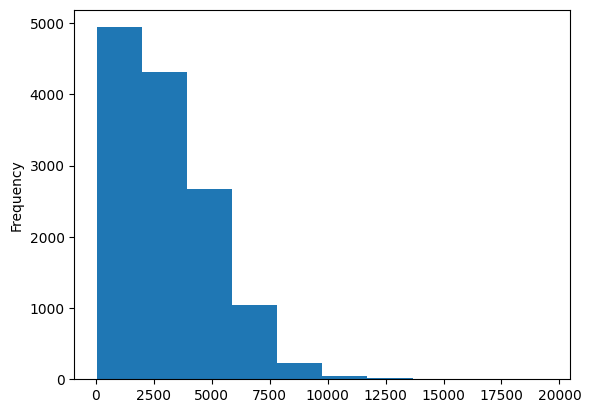

In [ ]:
import matplotlib.pyplot as plt
dou_useful['salary'].plot(kind='hist')
plt.show()

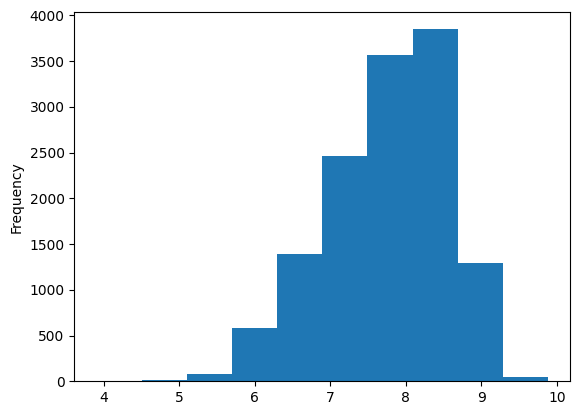

In [ ]:
dou_useful['log_salary'] = np.log(dou_useful['salary'])
dou_useful['log_salary'].plot(kind='hist')
plt.show()

In [ ]:
dou_useful = dou_useful.drop('salary', axis=1)

# 3. Побудова моделі

## 3.1. Розбиття датасету на тренувальну та тестову частини

In [ ]:
from sklearn.model_selection import train_test_split
X = dou_useful.drop('log_salary', axis=1)
y = dou_useful['log_salary']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2023)

## 3.2. Створення екземпляру моделі

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)

## 3.3. Навчання моделі на тренувальних даних

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

## 3.4. Перевірка якості моделі на відкладеній вибірці (validation)

In [ ]:
y_pred = knn.predict(X_valid)

from sklearn.metrics import mean_squared_error
print('MSE =', mean_squared_error(y_valid, y_pred))

MSE = 0.27623872071669614


In [ ]:
from sklearn.metrics import r2_score
print('R2 =', r2_score(y_valid, y_pred))

R2 = 0.5669097706449955


## 3.5. Підбір гіперпараметрів, крос-валідація

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, {'n_neighbors': np.arange(1, 50, 2)},
                        scoring='r2', cv=5)

In [ ]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='r2')

In [ ]:
knn_grid.best_params_

{'n_neighbors': 11}

In [ ]:
knn_grid.best_score_

0.5637819898030263

In [ ]:
knn_best = knn_grid.best_estimator_
y_pred = knn_best.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.5750703279737616


In [ ]:
knn_grid.cv_results_

{'mean_fit_time': array([0.00454092, 0.00435896, 0.00594807, 0.00842714, 0.01114645,
        0.00703635, 0.01767426, 0.01554408, 0.00731969, 0.01166143,
        0.00900631, 0.01227565, 0.01372237, 0.0136044 , 0.01474829,
        0.00745363, 0.00412354, 0.00411272, 0.00391331, 0.00406952,
        0.00420051, 0.00413909, 0.00416517, 0.0040278 , 0.00392218]),
 'std_fit_time': array([5.99512096e-04, 4.02574989e-04, 8.05623639e-04, 3.56599707e-03,
        5.73172006e-03, 2.27887531e-03, 1.10141501e-02, 6.81995814e-03,
        3.07290922e-03, 4.83171506e-03, 4.08044915e-03, 4.37031219e-03,
        1.92781328e-03, 8.87452580e-03, 5.04756307e-03, 3.50115447e-03,
        1.54434784e-04, 9.56854287e-05, 9.44771458e-05, 6.95333224e-05,
        4.12887384e-04, 1.30486260e-04, 2.63806511e-04, 2.10536614e-04,
        1.30491470e-04]),
 'mean_score_time': array([0.08460956, 0.10535336, 0.17637038, 0.26398315, 0.36540766,
        0.26991158, 0.63753362, 0.35772963, 0.24818482, 0.23761168,
        0.30

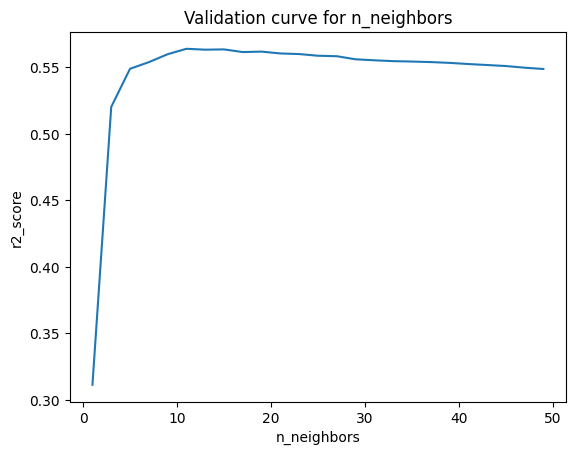

In [ ]:
params = np.arange(1, 50, 2)
scores = knn_grid.cv_results_['mean_test_score']
plt.plot(params, scores)
plt.xlabel('n_neighbors')
plt.ylabel('r2_score')
plt.title('Validation curve for n_neighbors')
plt.show()

In [ ]:
knn_grid = GridSearchCV(knn, {'n_neighbors': np.arange(1, 50, 2), 'p': [1, 2]},
                        scoring='r2', cv=5)
knn_grid.fit(X_train, y_train)
print(knn_grid.best_params_, knn_grid.best_score_)

{'n_neighbors': 17, 'p': 1} 0.5868466254020521


In [ ]:
knn_best = knn_grid.best_estimator_
y_pred = knn_best.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.5937230602280001


# 4. Модель № 2. Дерево рішень

## Побудова, навчання та валідація моделі на відкладеній вибірці

In [ ]:
# Етап train_test_split вже пройдено

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=2023)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_valid)

print(mean_squared_error(y_valid, y_pred))
print(r2_score(y_valid, y_pred))

0.40137041441541976
0.37072686846909186


In [ ]:
print(tree.tree_.max_depth)

34


## Візуалізація дерева (графа)

In [ ]:
# Визуализация
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='/content/drive/MyDrive/Data Science/Math/tree.dot', feature_names=X.columns)
# print(open('tree.dot').read())
# Далее скопировать полученный текст на сайт https://dreampuf.github.io/GraphvizOnline/ и сгенерировать граф
# Вставить картинку в блокнот: ![](ссылка)

## Підбір гіперпараметрів "вручну"

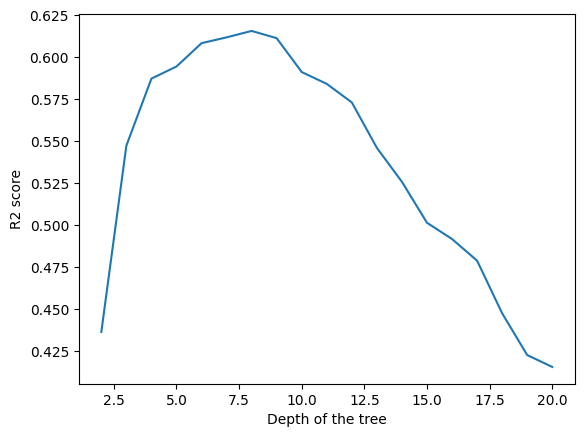

In [ ]:
r2_scores = []
for depth in range(2, 21):
  tree = DecisionTreeRegressor(max_depth=depth, random_state=2023)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_valid)
  r2_scores.append(r2_score(y_valid, y_pred))

plt.plot(list(range(2, 21)), r2_scores)
plt.xlabel('Depth of the tree')
plt.ylabel('R2 score')
plt.show()

In [ ]:
pd.DataFrame({'depth': np.arange(2, 21), 'R2 score': r2_scores})

,depth,R2 score
0,2,0.436477
1,3,0.547386
2,4,0.587300
3,5,0.594497
4,6,0.608386
5,7,0.611853
6,8,0.615686
7,9,0.611357
8,10,0.591203
9,11,0.584158


In [ ]:
tree = DecisionTreeRegressor(max_depth=8, random_state=2023)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_valid)

print(mean_squared_error(y_valid, y_pred))
print(r2_score(y_valid, y_pred))

0.2451277893961972
0.6156858449986744


In [ ]:
export_graphviz(tree, out_file='/content/drive/MyDrive/Data Science/Math/tree.dot', feature_names=X.columns)
# print(open('tree.dot').read())
# Далее скопировать полученный текст на сайт https://dreampuf.github.io/GraphvizOnline/ и сгенерировать граф
# Вставить картинку в блокнот: ![](ссылка)

## Важливість ознак

In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(tree.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
3,work_experience,0.548
12,title_Junior,0.131
14,title_Middle,0.089
11,title_Intern/Trainee,0.084
18,title_Немає тайтлу,0.046
2,english_level,0.043
15,title_Senior,0.014
19,company_type_Інша,0.013
1,age,0.013
20,company_type_Аутсорсингова,0.003


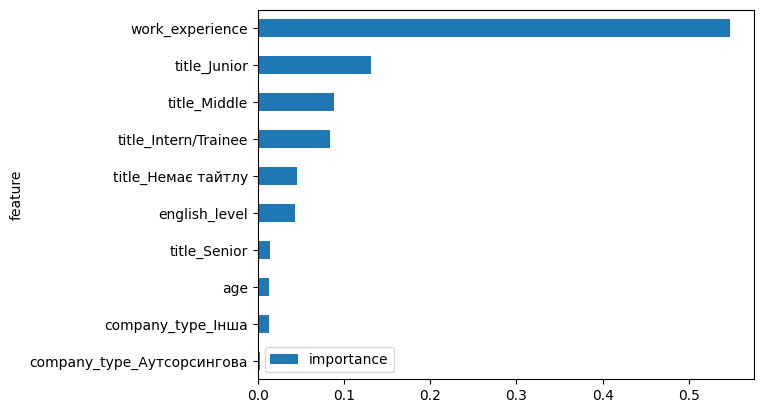

In [ ]:
feature_importances.set_index('feature').head(10).sort_values('importance').plot(kind='barh')
plt.show()

## Підбір гіперпараметрів за допомогою крос-валідації

In [ ]:
tree = DecisionTreeRegressor(random_state=2023)
tree_grid = GridSearchCV(tree, {'splitter': ['best', 'random'],
                                'max_depth': np.arange(3, 11),
                                'min_samples_split': np.arange(2, 11),
                                'min_samples_leaf': np.arange(2, 11)},
                         cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
tree_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
tree_grid.best_score_

-0.22760417400343017

In [ ]:
best_tree = tree_grid.best_estimator_
y_pred = best_tree.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.6270151422099889


In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(best_tree.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances.head(10)

,feature,importance
12,title_Junior,0.460
11,title_Intern/Trainee,0.150
14,title_Middle,0.144
18,title_Немає тайтлу,0.096
3,work_experience,0.063
2,english_level,0.040
19,company_type_Інша,0.015
13,title_Manager,0.009
1,age,0.006
20,company_type_Аутсорсингова,0.004


# Модель № 3. Випадковий ліс

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.5814129345508665


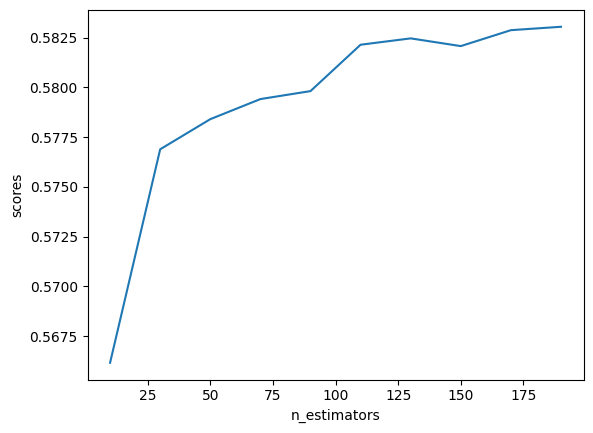

In [ ]:
r2_scores = []
for n_trees in range(10, 200, 20):
  rf = RandomForestRegressor(n_estimators=n_trees, random_state=2023, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_valid)
  r2_scores.append(r2_score(y_valid, y_pred))

plt.plot(list(range(10, 200, 20)), r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('scores')

plt.show()

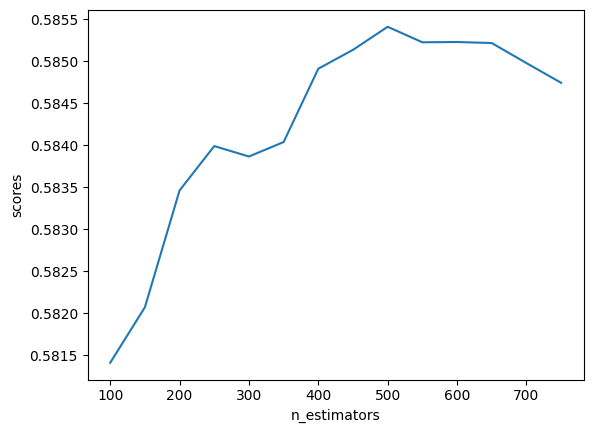

In [ ]:
r2_scores = []
for n_trees in range(100, 800, 50):
  rf = RandomForestRegressor(n_estimators=n_trees, random_state=2023, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_valid)
  r2_scores.append(r2_score(y_valid, y_pred))

plt.plot(list(range(100, 800, 50)), r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('scores')

plt.show()

In [ ]:
rf_500 = RandomForestRegressor(n_estimators=500, random_state=2023, n_jobs=-1)
rf_500.fit(X_train, y_train)
y_pred = rf_500.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.5854074790780364


In [ ]:
rf_base = RandomForestRegressor(random_state=2023, n_jobs=-1)
rf_grid = GridSearchCV(rf_base, {'n_estimators': np.arange(50, 501, 50),
                                 'max_depth': np.arange(3, 15)},
                       cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, random_state=2023),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
             scoring='r2')

In [ ]:
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [ ]:
rf_grid.best_score_

0.656129656867483

In [ ]:
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.6456126710471956


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_rand = RandomizedSearchCV(rf_base, {'n_estimators': np.arange(50, 501, 50),
                                       'max_depth': np.arange(3, 15)},
                             cv=5, scoring='r2')
rf_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1,
                                                   random_state=2023),
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   scoring='r2')

In [ ]:
rf_rand.best_params_

{'n_estimators': 100, 'max_depth': 10}

In [ ]:
rf_rand.best_score_

0.6538849357339389

In [ ]:
best_rf = rf_rand.best_estimator_
y_pred = rf_rand.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.6442484761275467


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_rand = RandomizedSearchCV(rf_base, {'n_estimators': np.arange(50, 501, 50),
                                       'max_depth': np.arange(3, 15),
                                       'max_features': np.arange(5, 21),
                                       'min_samples_split': np.arange(2, 11)},
                             cv=5, scoring='r2')
rf_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1,
                                                   random_state=2023),
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   scoring='r2')

In [ ]:
rf_rand.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 10,
 'max_depth': 12}

In [ ]:
rf_rand.best_score_

0.6658848192071074

In [ ]:
best_rf = rf_rand.best_estimator_
y_pred = rf_rand.predict(X_valid)
print(r2_score(y_valid, y_pred))

0.6574872262534053
